# Question 1 - Extracting Tesla Stock Data Using yfinance


In [6]:
!pip install yfinance

import yfinance as yf

Tesla = yf.Ticker("TSLA")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 95.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 88.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 21.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138634 sha256=c844d8159991a944039ebe007e8aecf5ff3169989e11935281b718bfe8acca03
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/f7/47/5a/f60cfd4dd60dad2a4f66a9fabe98dc0b97d82f7112846dbb21
Successfully built peewee
  Attempting uninstall: typing-extensions
    Found existing installation: typing_

In [10]:
TSLA_data = Tesla.history(period="max")

# Q2 Extracting Tesla Revenue Data Using Webscraping



In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"


response = requests.get(url)


soup = BeautifulSoup(response.text, 'html5lib')


tesla_data = pd.DataFrame(columns=["Revenue"])


for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Revenue = col[0].text
    tesla_data = tesla_data.append({"Revenue": Revenue}, ignore_index=True)



# Q3 

In [47]:

Game = yf.Ticker("GME")
TSLA_data = Game.history(period="max")

# Q4

In [ ]:

url = "https://finance.yahoo.com/quote/GME/"


response = requests.get(url)


soup = BeautifulSoup(response.text, 'html5lib')


gme_data = pd.DataFrame(columns=["Revenue"])


for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Revenue = col[0].text
    tesla_data = tesla_data.append({"Revenue": Revenue}, ignore_index=True)



# Q5

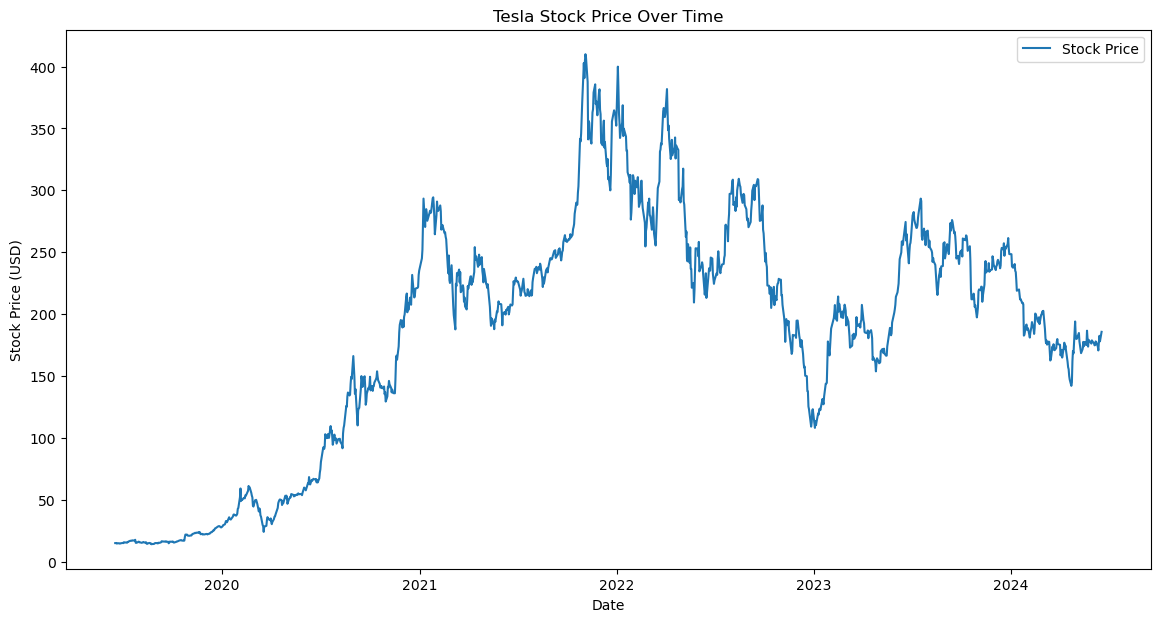

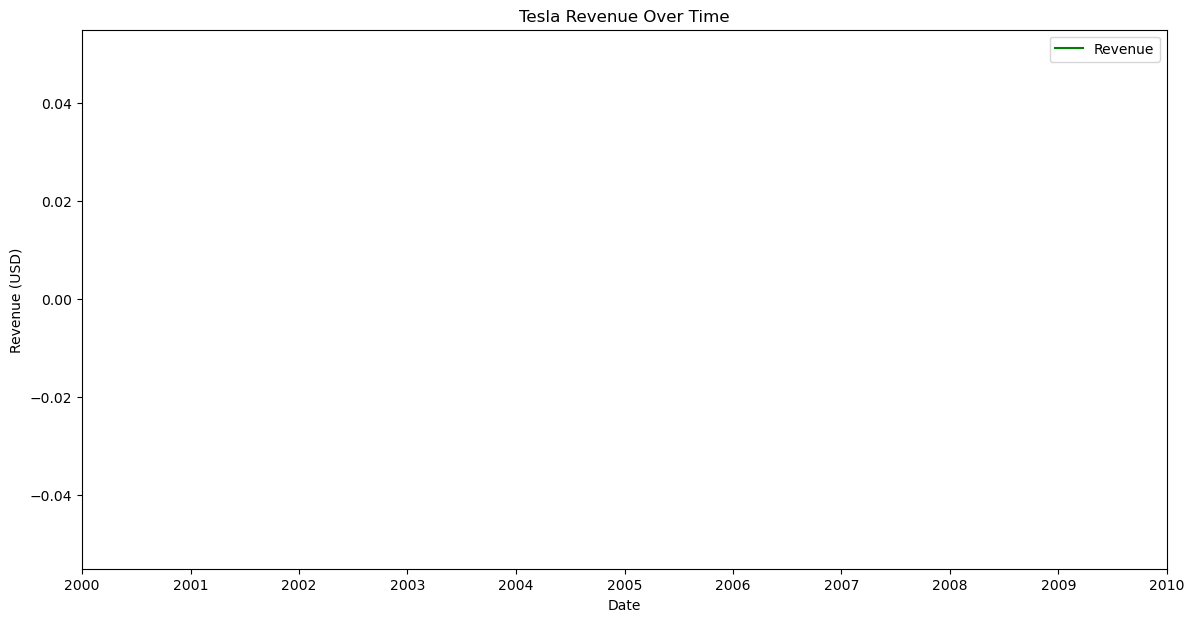

In [50]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


tesla = yf.Ticker("TSLA")
stock_data = tesla.history(period="5y")  # Fetch last 5 years of data


url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


table = soup.find("table")
for row in table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if col[0].text.strip().startswith("Total Revenue"):
        for i in range(1, len(col)):
            date = col[i].get('title', None)
            revenue = col[i].text.replace(',', '').replace('T', '000000000000').replace('B', '000000000').replace('M', '000000')
            revenue_data = revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert 'Date' and 'Revenue' to appropriate types
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"], format='%m/%d/%Y')
revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors='coerce')

# stock price
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price Over Time')
plt.legend()
plt.show()

# revenue
plt.figure(figsize=(14, 7))
plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.title('Tesla Revenue Over Time')
plt.legend()
plt.show()


# Q6

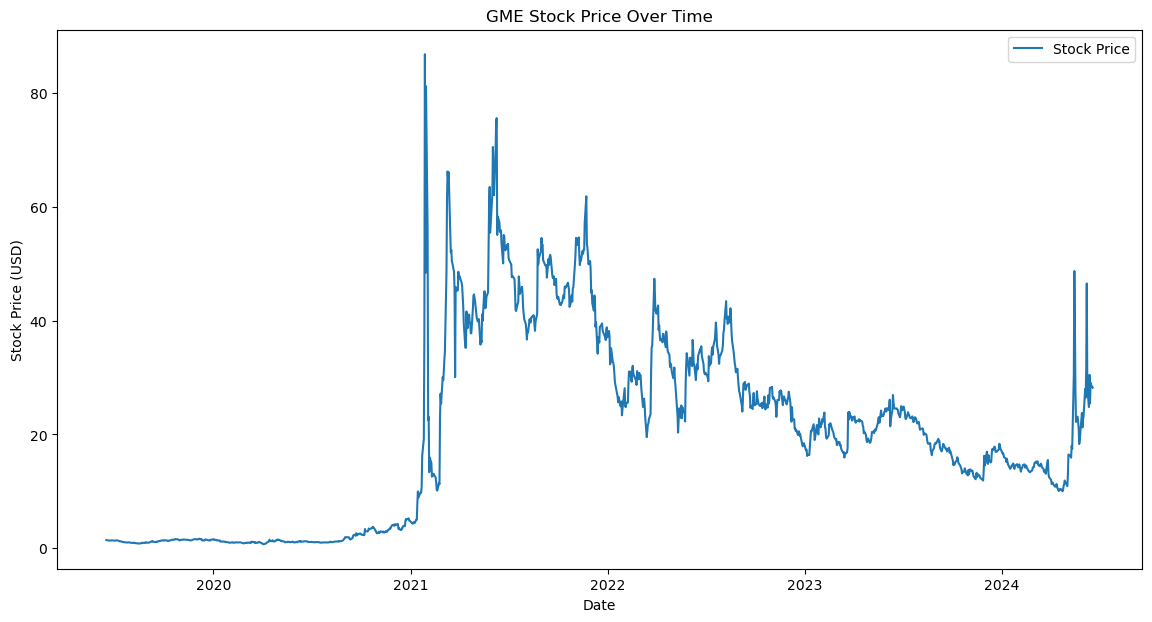

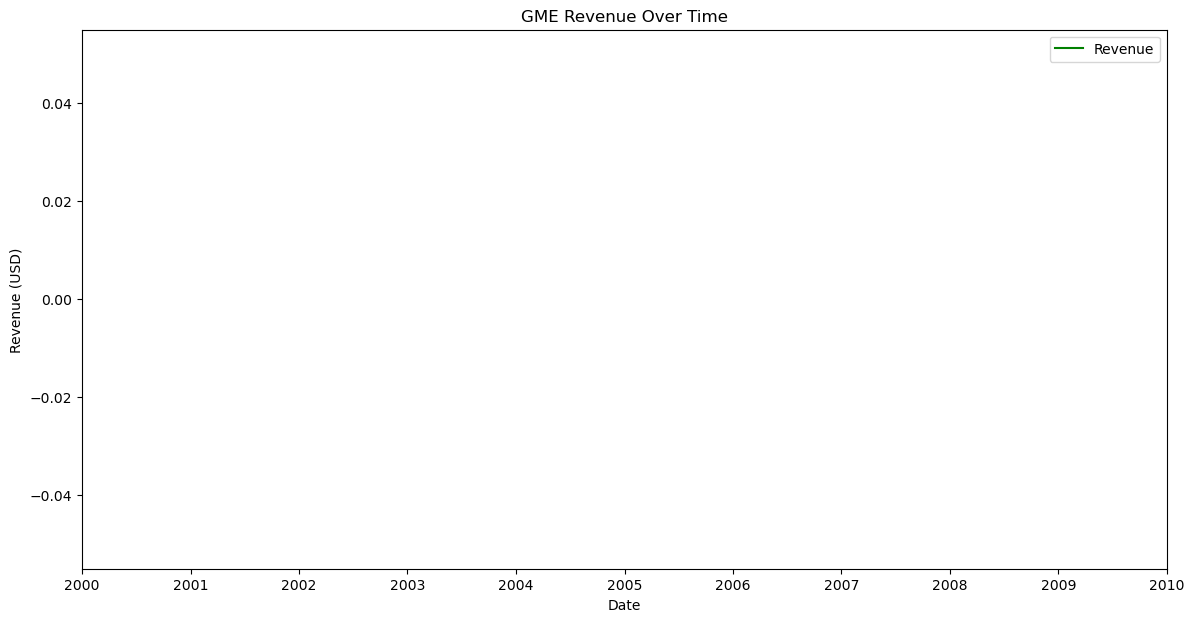

In [52]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


tesla = yf.Ticker("GME")
stock_data = tesla.history(period="5y")  # Fetch last 5 years of data


url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


table = soup.find("table")
for row in table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if col[0].text.strip().startswith("Total Revenue"):
        for i in range(1, len(col)):
            date = col[i].get('title', None)
            revenue = col[i].text.replace(',', '').replace('T', '000000000000').replace('B', '000000000').replace('M', '000000')
            revenue_data = revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert 'Date' and 'Revenue' to appropriate types
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"], format='%m/%d/%Y')
revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors='coerce')

# stock price
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('GME Stock Price Over Time')
plt.legend()
plt.show()

# revenue
plt.figure(figsize=(14, 7))
plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.title('GME Revenue Over Time')
plt.legend()
plt.show()